Credit Card Default Analysis - Part 1 EDA
Default Payments of Credit Card Clients in Taiwan from 2005

1. Import Data


Data source from Kaggle: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

Original data source: http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

My git link: https://raw.githubusercontent.com/astha1997/hello-world/main/CreditCardDataset.csv

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/astha1997/hello-world/main/CreditCardDataset.csv")

In [3]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
data.to_csv("CreditCard.csv")

In [5]:
df=data

In [4]:
d=data

2. Understanding the Data

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


(1) Description of columns from dataset documentation

    There are 25 variables:
    • ID: ID of each client
    • LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    • SEX: Gender (1=male, 2=female)
    • EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    • MARRIAGE: Marital status (1=married, 2=single, 3=others)
    • AGE: Age in years
    • PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
    • PAY_2: Repayment status in August, 2005 (scale same as above)
    • PAY_3: Repayment status in July, 2005 (scale same as above)
    • PAY_4: Repayment status in June, 2005 (scale same as above)
    • PAY_5: Repayment status in May, 2005 (scale same as above)
    • PAY_6: Repayment status in April, 2005 (scale same as above)
    • BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    • BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    • BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    • BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    • BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    • BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    • PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    • PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    • PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    • PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    • PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    • PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    • default.payment.next.month: Default payment (1=yes, 0=no)

In [7]:
# Understand the data by printing out all column names

df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [14]:
# Understand the data by checking the first row

df.loc[0]

ID                                1
LIMIT_BAL                     20000
SEX                               2
EDUCATION                         2
MARRIAGE                          1
AGE                              24
PAY_0                             2
PAY_2                             2
PAY_3                            -1
PAY_4                            -1
PAY_5                            -2
PAY_6                            -2
BILL_AMT1                      3913
BILL_AMT2                      3102
BILL_AMT3                       689
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                        689
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
default payment next month        1
Name: 0, dtype: int64

2. For Paymentstatus PAY_0 to PAY_6 trying to understand -2 , -1 and 0 in the dataset 

    From Kaggle discussion :

    -2 = Balance paid in full and no transactions this period (we may refer to this credit card account as having been 'inactive' this period)

    -1 = Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due

    0 = Customer paid the minimum due amount, but not the entire balance. I.e., the customer paid enough for their account to remain in good standing, but did revolve a balance


https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/34608#298207


In [15]:
# Sort the repayment status codes in PAY_X columns by melting them into 1 column
# Notice there are 2 undocumented codes: 0,-2

pay = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
pay_melt = pd.melt(pay)
print(pay_melt['value'].value_counts())

value
 0    95919
-1    34640
-2    24415
 2    18964
 1     3722
 3     1430
 4      453
 7      218
 5      137
 6       74
 8       28
Name: count, dtype: int64


From here we can conclude that 0 has the highest frequency in the payment status columns .

(3) 'default payment next month'
"Y: client's behavior; Y=0 then not default, Y=1 then default". This information could be used to test the accuracy of the model that will be built.

In [18]:
# Get the proportion of customers who had default payment in the next month (Oct.2005)? 
# About 22% customers had default payment next month

df['default payment next month'].value_counts(normalize=True)

default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

This implies that around 22% clients are the defaulters.

3. Cleaning the data

In [19]:
# Check column names, columan data type and indentify any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

There are no missing values , all data types are float or int 

In [20]:
df.duplicated().sum()

0

no duplicate records in the dataset

In [24]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
numerical_columns=df.columns[df.dtypes!='object']

In [12]:
numerical_columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

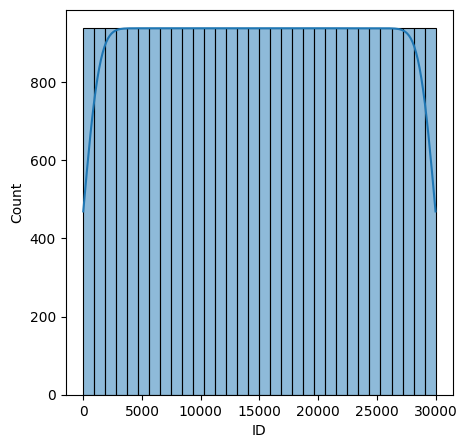

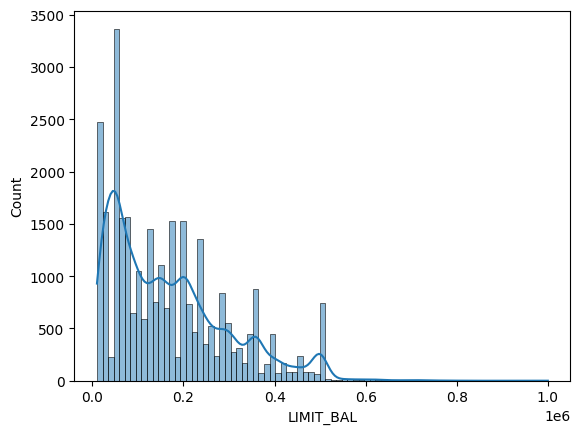

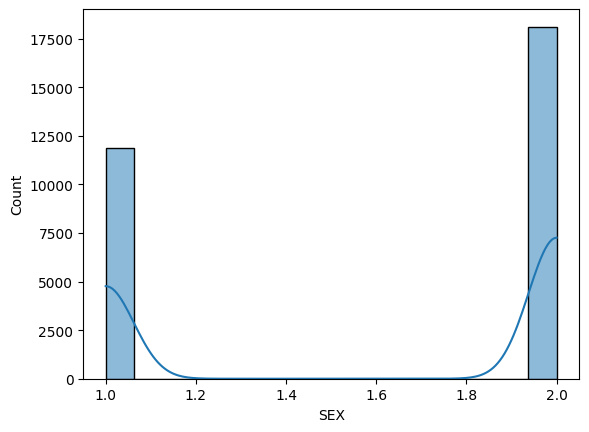

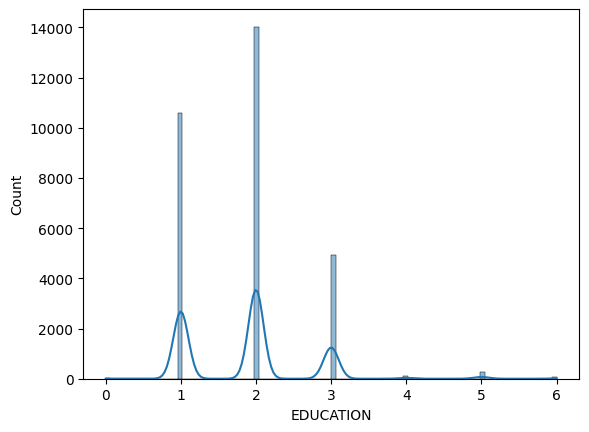

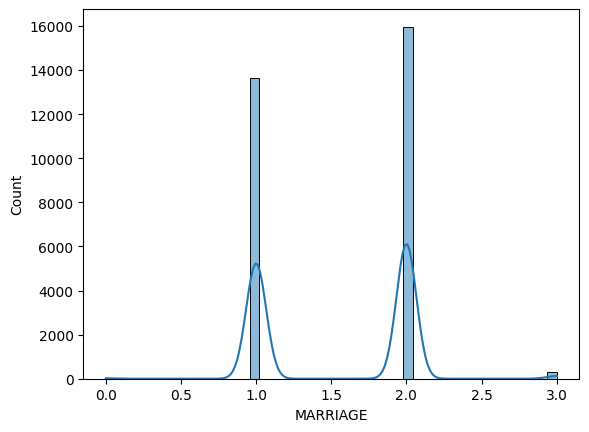

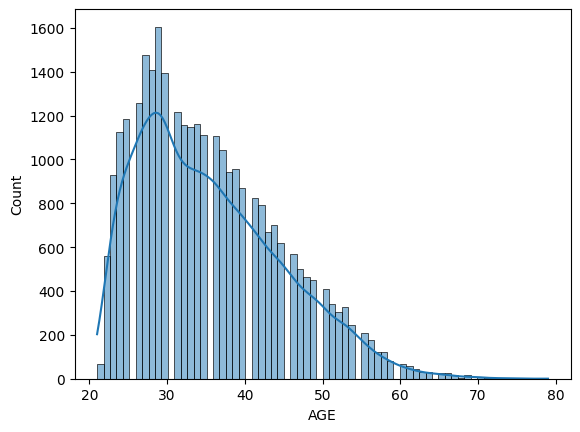

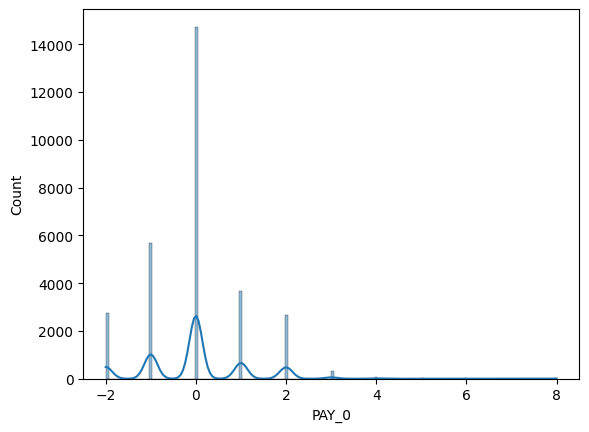

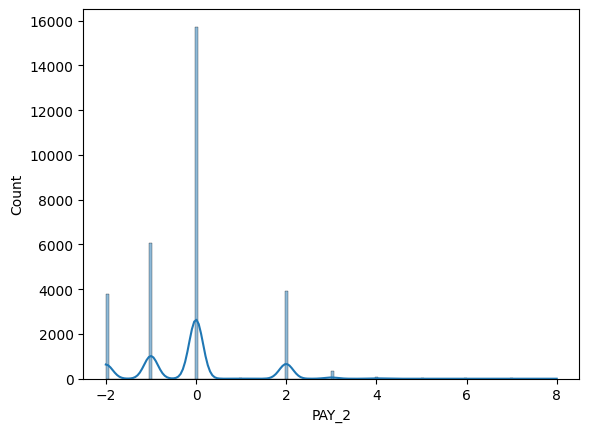

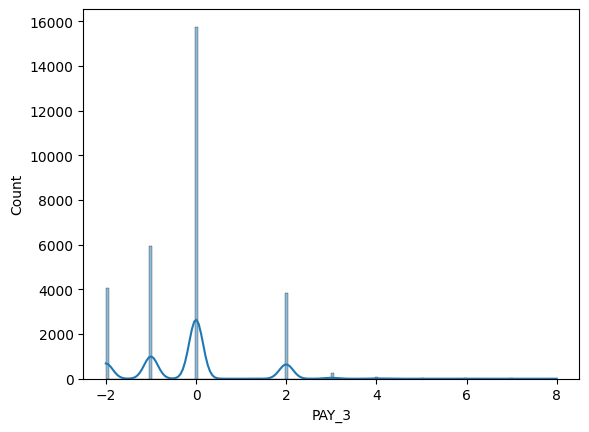

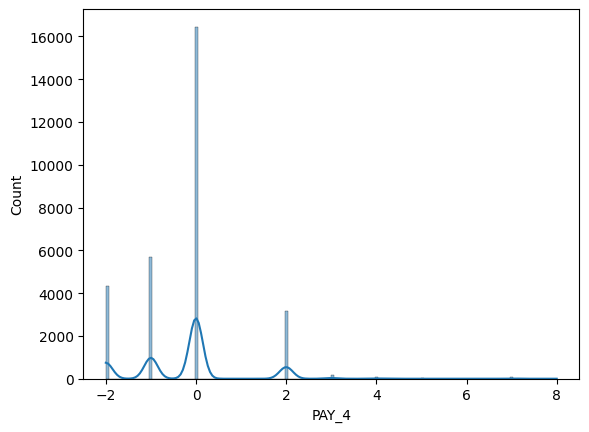

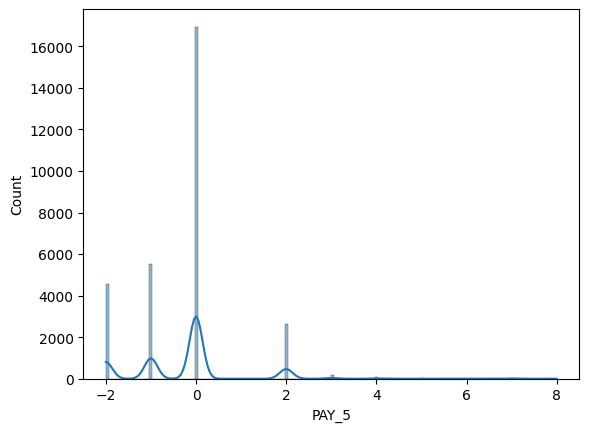

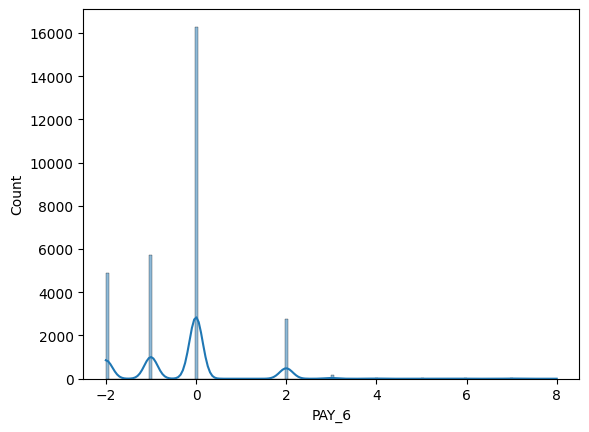

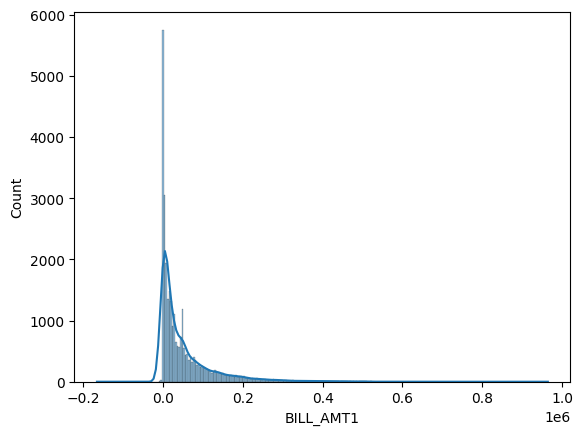

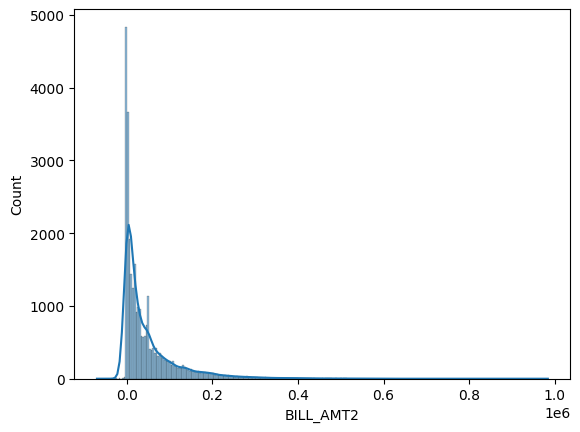

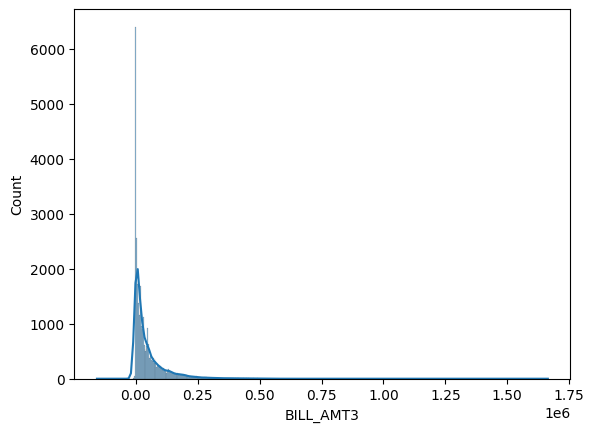

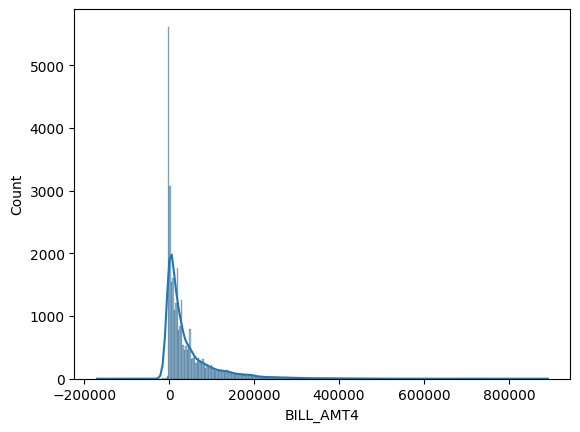

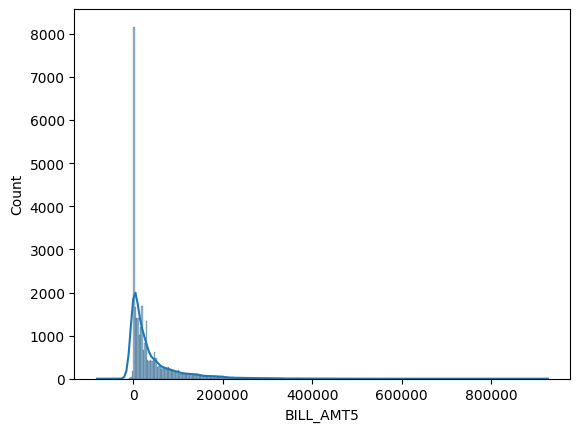

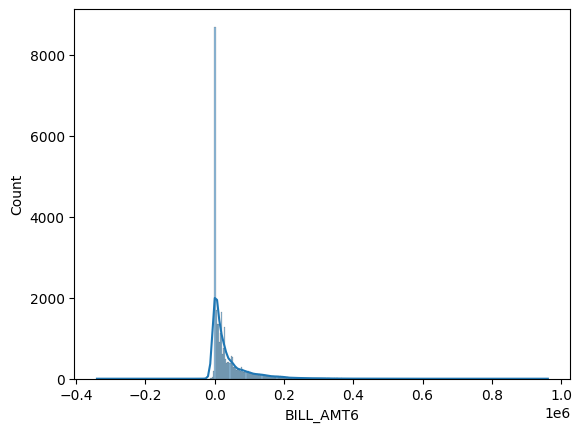

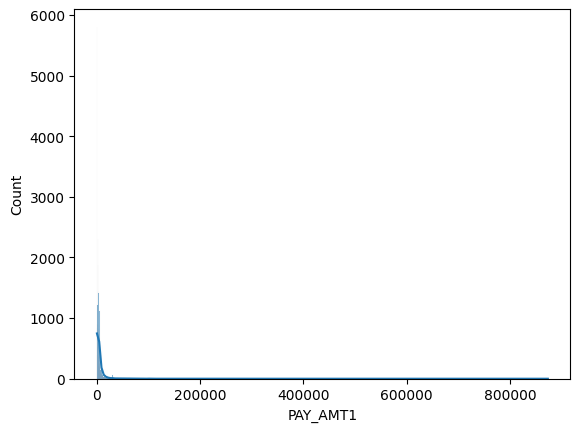

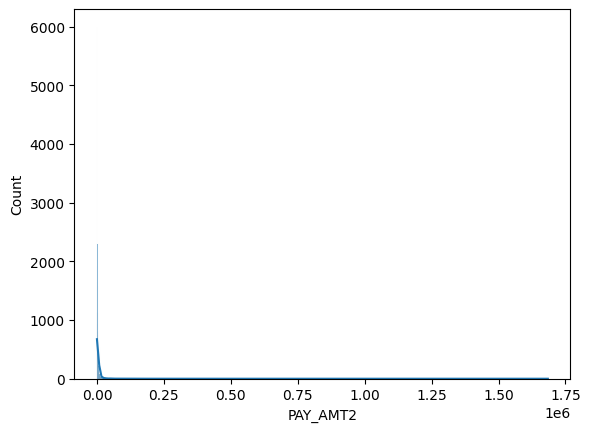

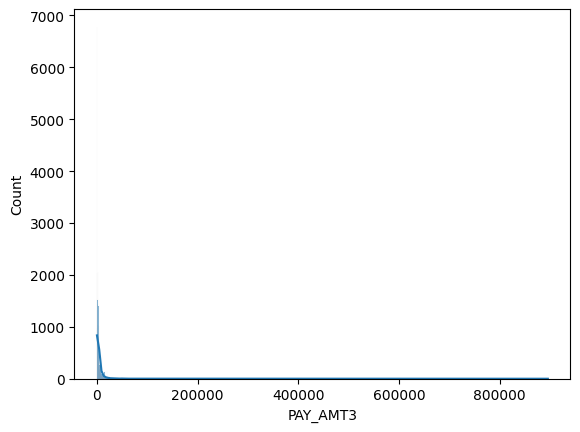

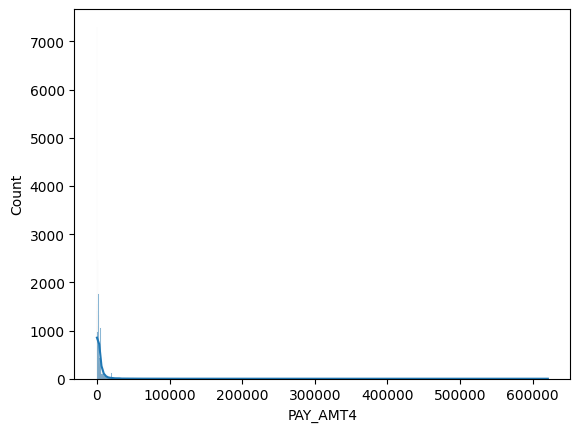

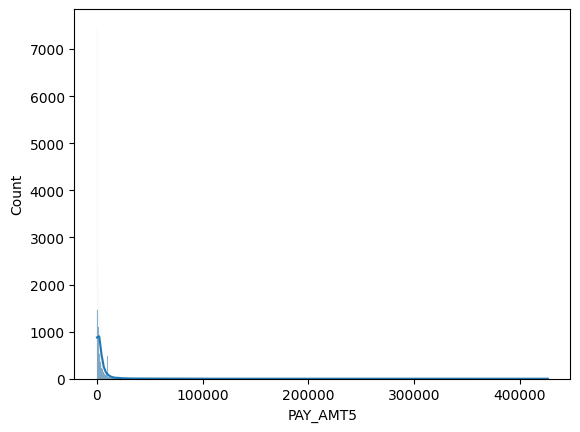

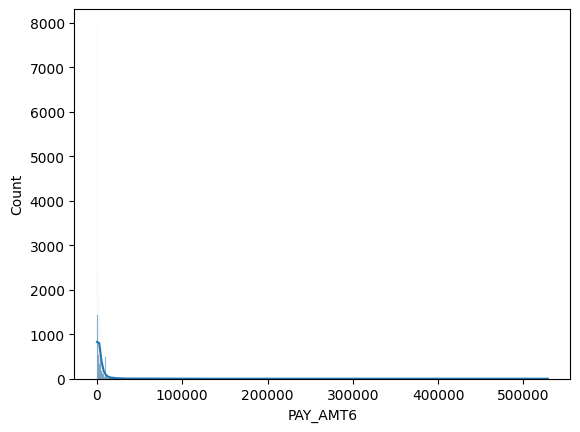

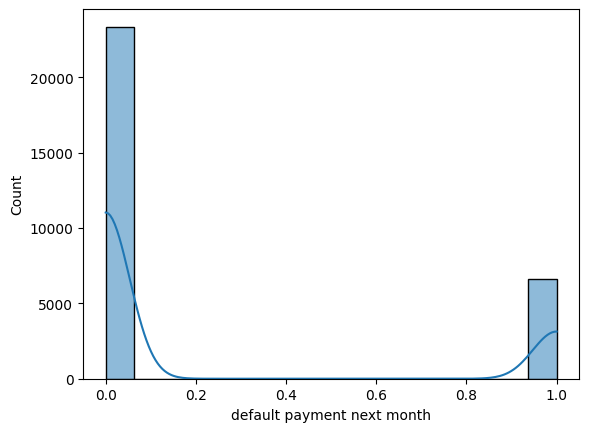

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
x=1
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()



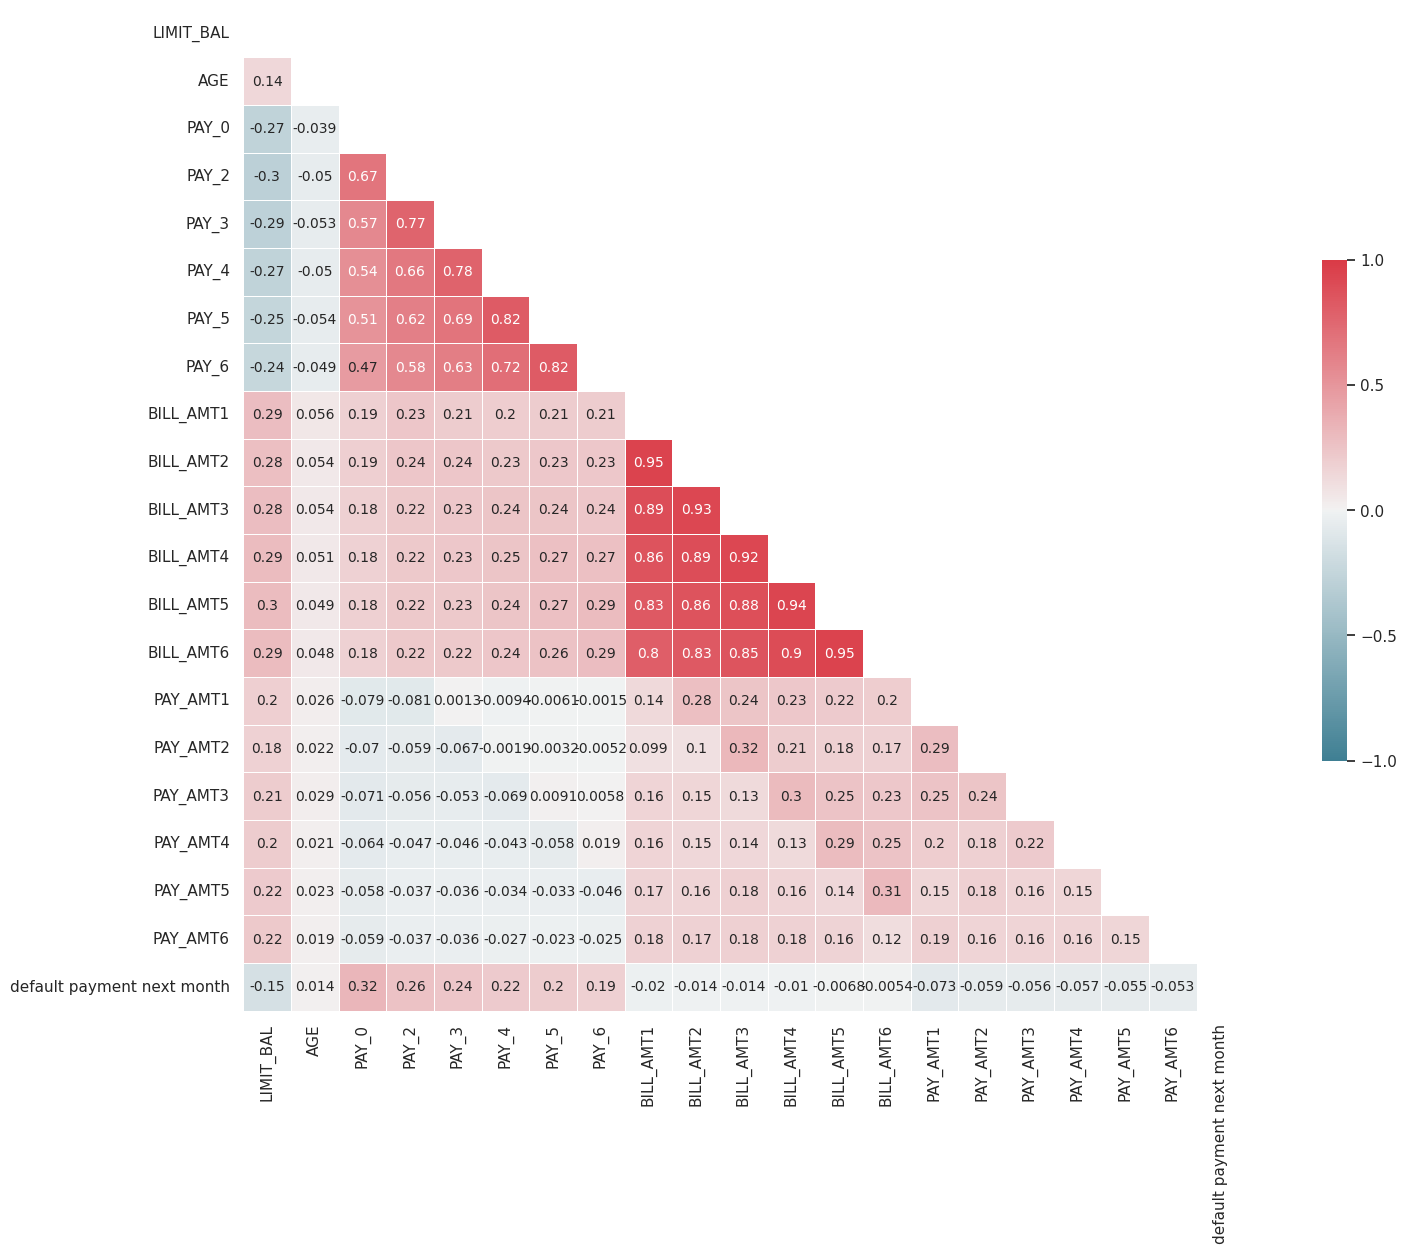

In [18]:
# Correlation matrix

import numpy as np

sns.set(style="white", font_scale=1)
numeric = ['LIMIT_BAL',  'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']
corr = data[numeric].corr() # .corr is used to find corelation

mask = np.triu(np.ones_like(corr, bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
# plt.xticks(fontsize=6)
# plt.yticks(fontsize=10)
# plt.show()
plt.savefig('Fig - Correlation matrix by means of the Pearson’s coefficient for all feature pairs.png')

In [6]:
# rename variable 'PAY_0' to 'PAY_1' 
df.rename(columns={"PAY_0": "PAY_1"}, inplace=True)
# rename target variable: 'default.payment.next.month' to 'Default'
df.rename(columns={"default payment next month": "Default"}, inplace=True)
# drop first attribute "ID"
df.drop('ID', axis = 1, inplace =True)
# Class label to category
df["Default"] = df["Default"].astype('int')

In [30]:
df["Default"] = df["Default"].astype('category')

In [7]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [9]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [12]:
import numpy as np
# category '0' undocumented is deleted
#df = data.drop(data[data['MARRIAGE']==0].index)
 #we could also group the 0 category with 3:others
df['MARRIAGE']=np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])

# categories 0, 5 and 6 are unknown and are deleted
#data = data.drop(data[data['EDUCATION']==0].index)
#data = data.drop(data[data['EDUCATION']==5].index)
#data = data.drop(data[data['EDUCATION']==6].index)
#we could also group the categories together
df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])

In [13]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [15]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

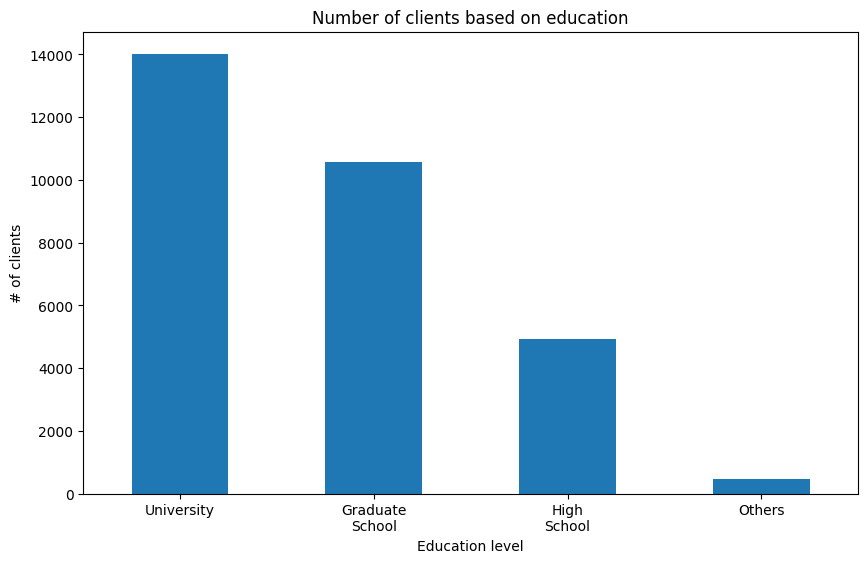

In [21]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
 
 # 1=graduate school, 2=university, 3=high school 4=others
df['EDUCATION'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title("Number of clients based on education")
plt.xticks([0,1,2,3],['University','Graduate\nSchool', 'High\nSchool', 'Others'],rotation=0)
plt.xlabel('Education level')
plt.ylabel('# of clients')
plt.show()
   

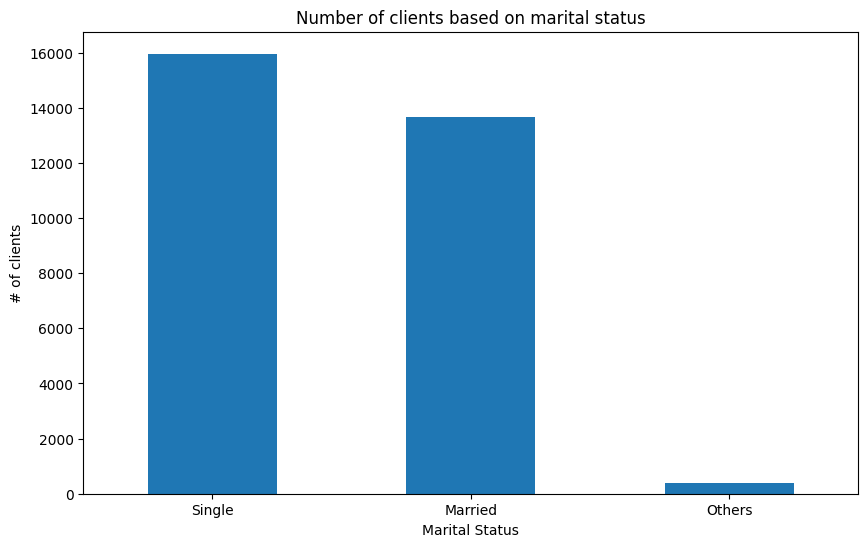

In [22]:
# 1=married, 2=single, 3=others
df['MARRIAGE'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title("Number of clients based on marital status")
plt.xticks([0,1,2],['Single','Married', 'Others'],rotation=0)
plt.xlabel('Marital Status')
plt.ylabel('# of clients')
plt.show()


In [29]:
# Payment delay description
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


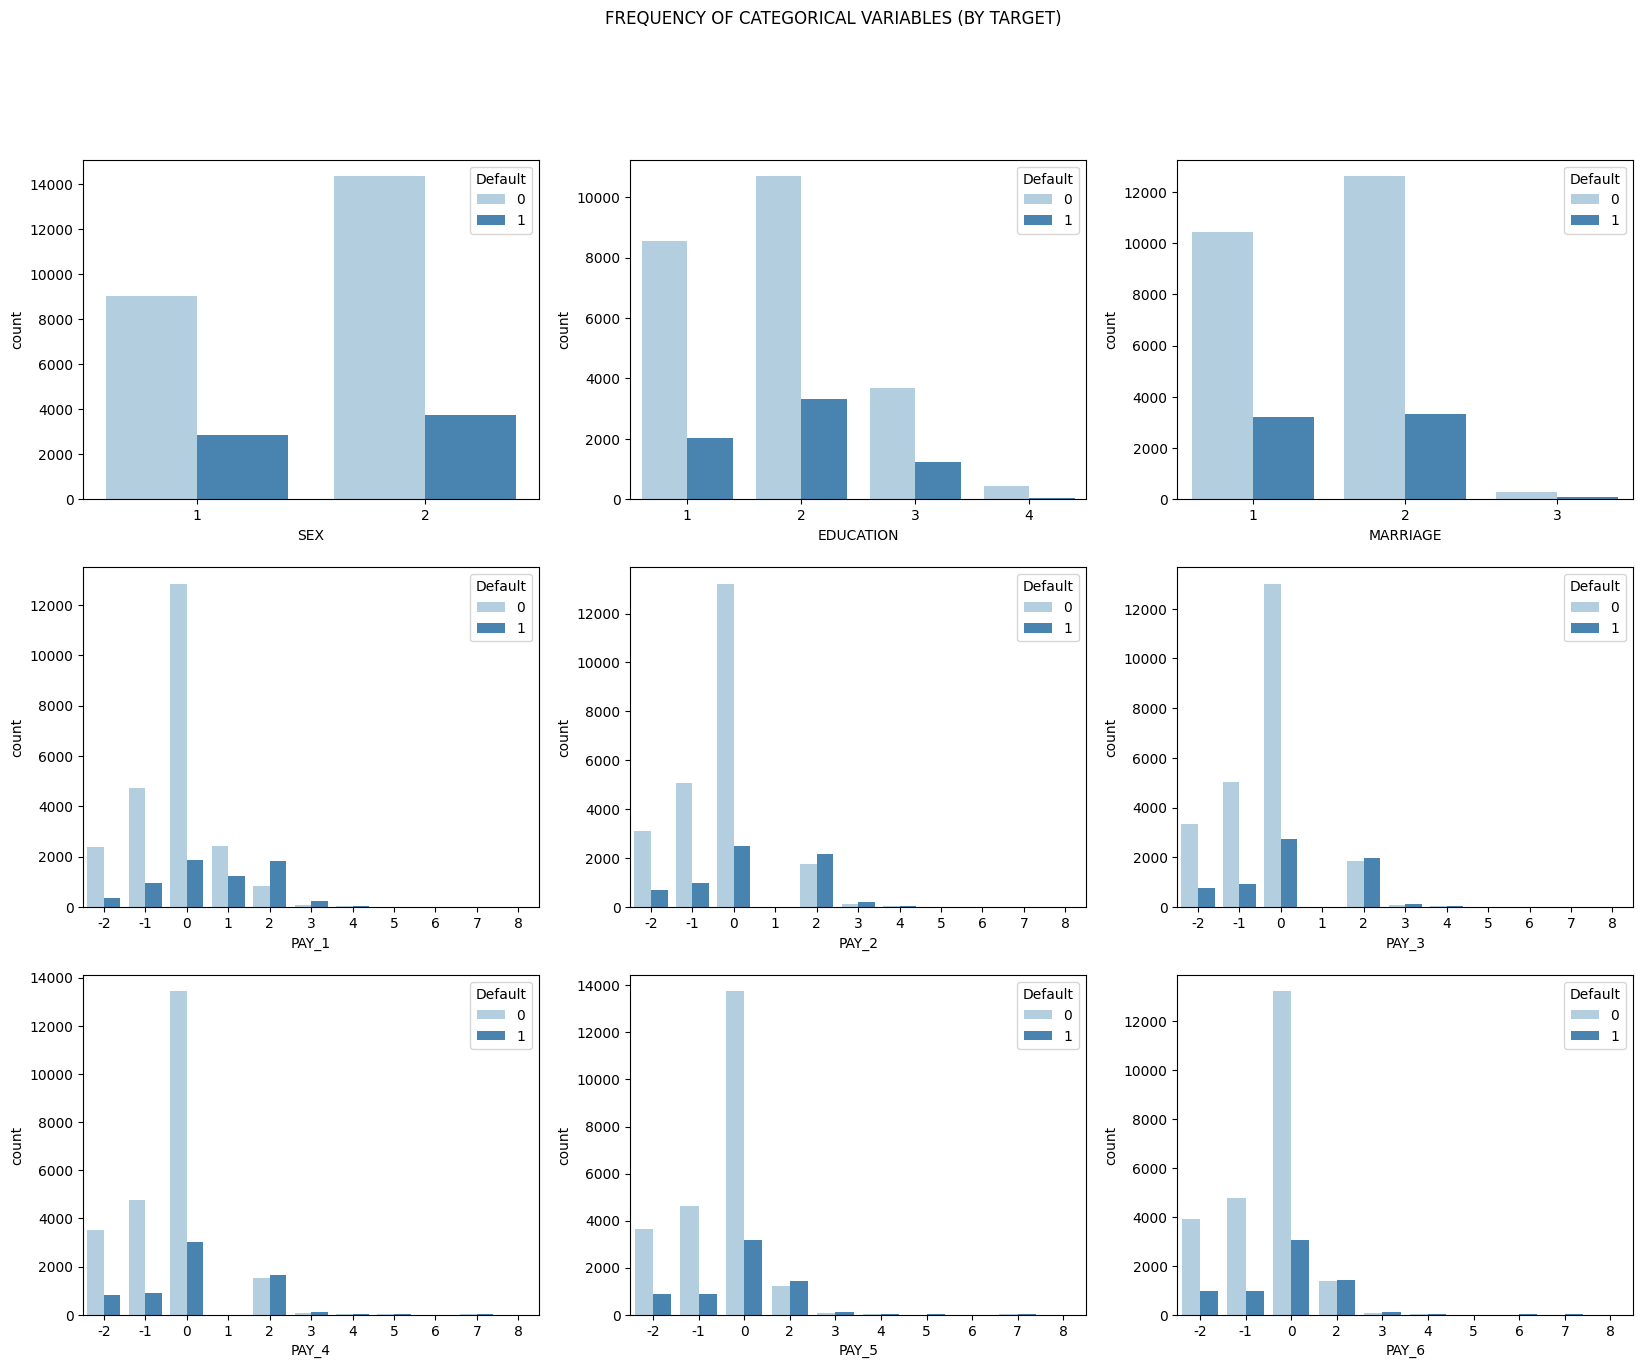

In [31]:
import seaborn as sns
# Creating a new dataframe with categorical variables
subset = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Default']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
#1:Male 2:Female
ax1 = sns.countplot(x="SEX", hue="Default", data=subset, palette="Blues", ax=axes[0,0])
#1:Graduate 2:University ,3: HighSchool , 4:Others
ax2 = sns.countplot(x="EDUCATION", hue="Default", data=subset, palette="Blues",ax=axes[0,1])
#1:Married 2:Single 3:Others
ax3 = sns.countplot(x="MARRIAGE", hue="Default", data=subset, palette="Blues",ax=axes[0,2])
#-1:no due ,0: paid minimum amount  , -2 : no transaction , 1: payment due 1 month....8:payment due 8 months
ax4 = sns.countplot(x="PAY_1", hue="Default", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="Default", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="Default", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="Default", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="Default", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="Default", data=subset, palette="Blues", ax=axes[2,2]);

Standardization
Another possible scaling technique is referred to as standardization, which transforms each value 
 of feature 
 as follows, independently for each column:

 
 
where 
 is the sample mean and 
 is the sample standard deviation of feature 
. This way, we force each attribute to have a new empirical mean value of 0 and variance 1.

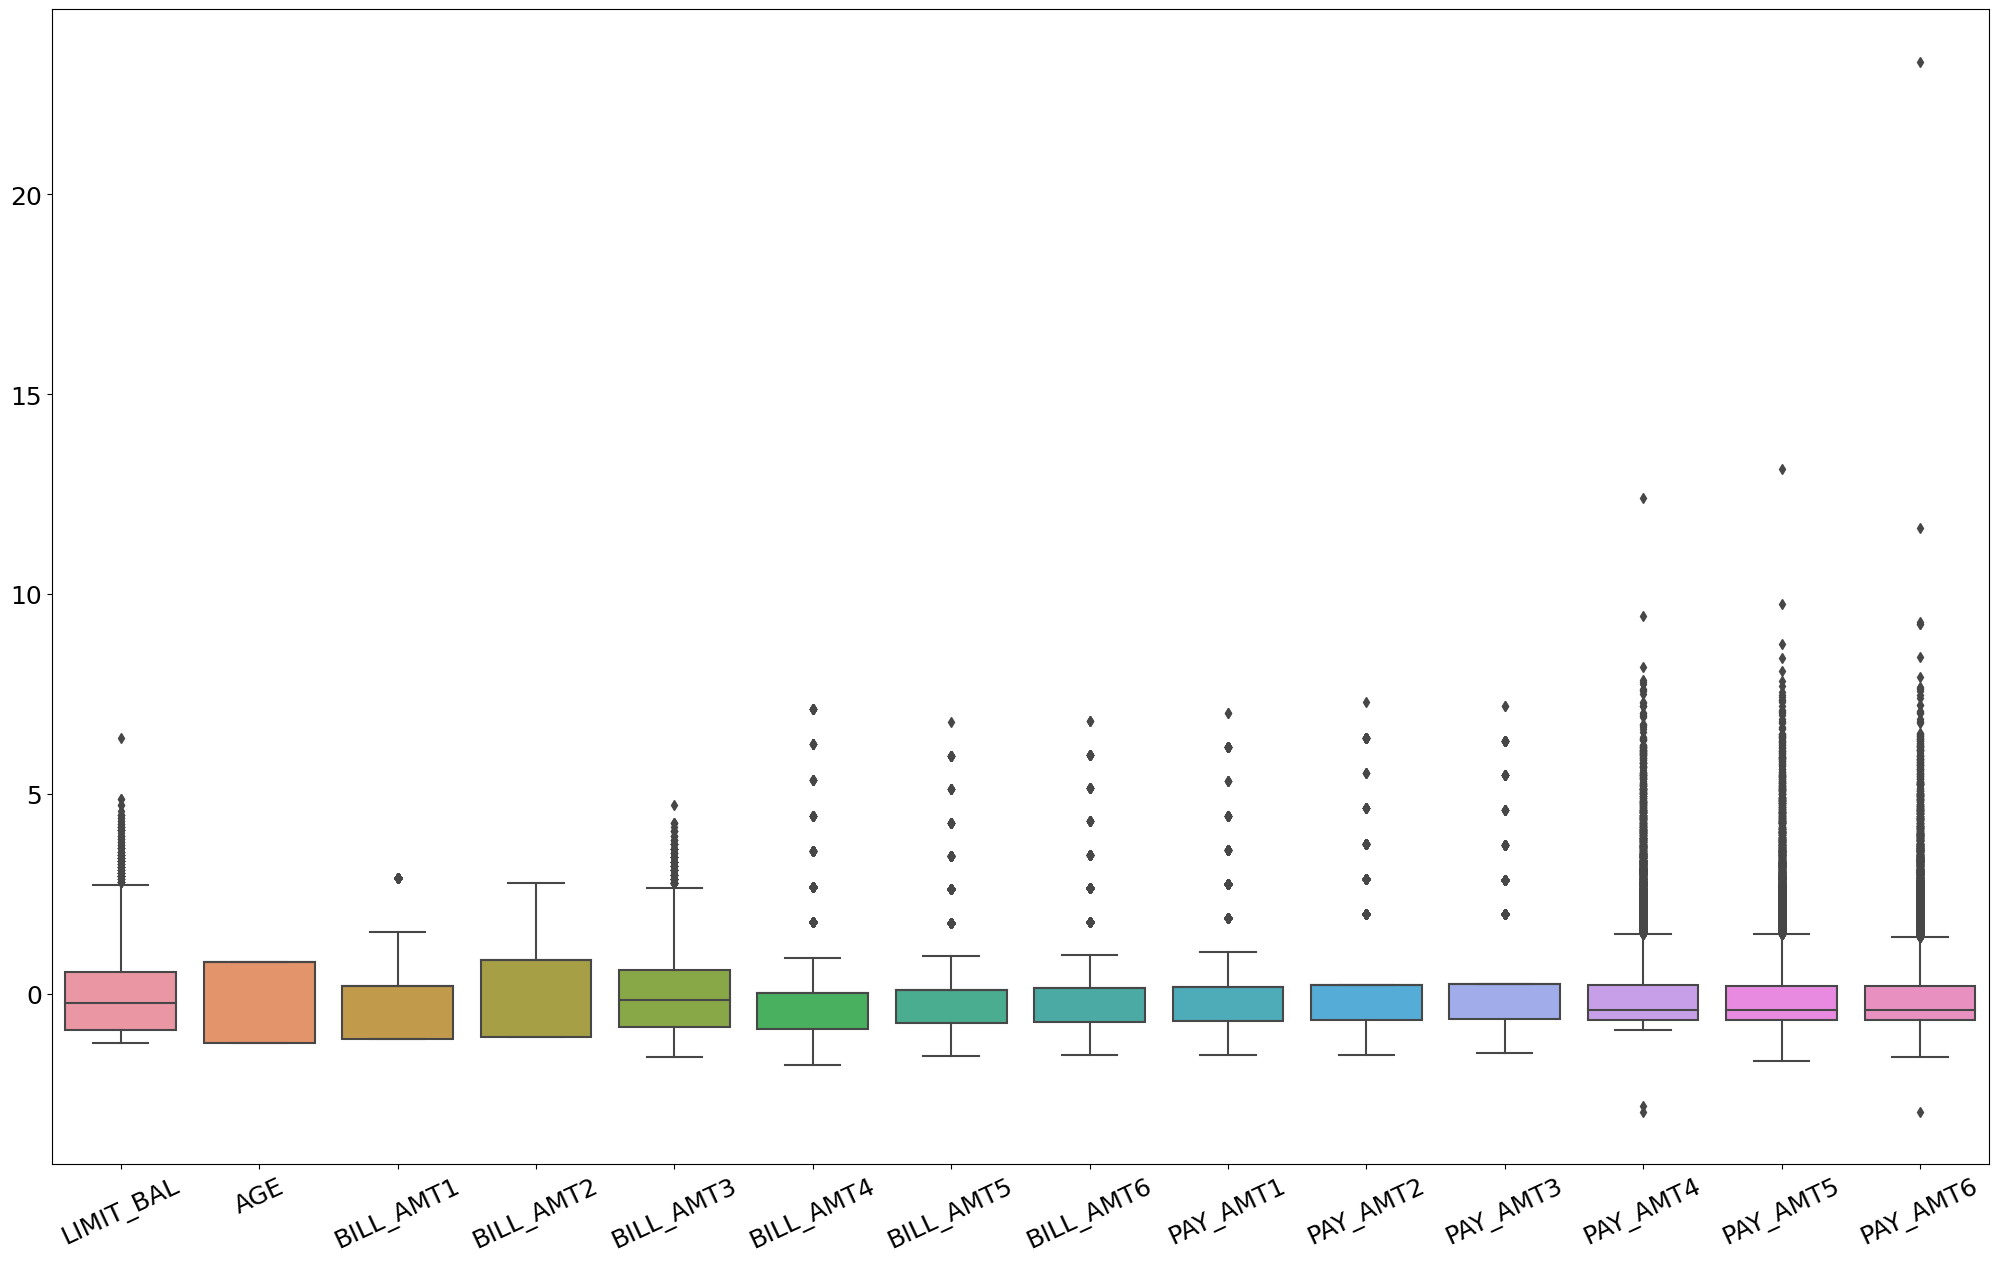

In [32]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# BOXPLOT
cols = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot(111)
sns.boxplot(data=scaled_data[:,:-10])
plt.xticks(np.arange(0,14), labels=cols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [34]:
# Set 'category' type to categorical attributes
for att in ['SEX', 'EDUCATION', 'MARRIAGE']:
    df[att] = df[att].astype('category')

# one-hot encoding
df=pd.concat([pd.get_dummies(df['SEX'], prefix='SEX'),
                pd.get_dummies(df['EDUCATION'], prefix='EDUCATION'), 
                pd.get_dummies(df['MARRIAGE'], prefix='MARRIAGE'),
                df],axis=1)
# drop original columns
df.drop(['EDUCATION'],axis=1, inplace=True)
df.drop(['SEX'],axis=1, inplace=True)
df.drop(['MARRIAGE'],axis=1, inplace=True)

# print samples
df.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,False,True,False,True,False,False,True,False,False,20000,...,0,0,0,0,689,0,0,0,0,1
1,False,True,False,True,False,False,False,True,False,120000,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,False,True,False,True,False,False,False,True,False,90000,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,False,True,False,True,False,False,True,False,False,50000,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,True,False,False,True,False,False,True,False,False,50000,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [35]:
df.replace({False: 0, True: 1}, inplace=True)

In [41]:
df.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,0,1,0,1,0,0,1,0,0,20000,...,0,0,0,0,689,0,0,0,0,1
1,0,1,0,1,0,0,0,1,0,120000,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,0,1,0,1,0,0,0,1,0,90000,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0,1,0,1,0,0,1,0,0,50000,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,0,0,1,0,0,1,0,0,50000,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [42]:
# Separating features and target
y = df.Default     # target default=1 or non-default=0
X = df.drop('Default', axis = 1, inplace = False)

In [43]:
# Check data set dimension
print(X.shape)
print("Number of samples:", X.shape[0])
print("Number of attributes:", X.shape[1])


(30000, 29)
Number of samples: 30000
Number of attributes: 29


In [44]:
X.head()

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,1,0,1,0,0,1,0,0,20000,...,689,0,0,0,0,689,0,0,0,0
1,0,1,0,1,0,0,0,1,0,120000,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,1,0,1,0,0,0,1,0,90000,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,1,0,1,0,0,1,0,0,50000,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,1,0,0,1,0,0,1,0,0,50000,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [11]:
d.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
d.rename(columns={"default payment next month": "Default"}, inplace=True)
# drop first attribute "ID"
d.drop('ID', axis = 1, inplace =True)
# Class label to category
d["Default"] = d["Default"].astype('category')

In [13]:
import numpy as np
# category '0' undocumented is deleted
#df = data.drop(data[data['MARRIAGE']==0].index)
 #we could also group the 0 category with 3:others
d['MARRIAGE']=np.where(d['MARRIAGE'] == 0, 3, d['MARRIAGE'])

# categories 0, 5 and 6 are unknown and are deleted
#data = data.drop(data[data['EDUCATION']==0].index)
#data = data.drop(data[data['EDUCATION']==5].index)
#data = data.drop(data[data['EDUCATION']==6].index)
#we could also group the categories together
d['EDUCATION']=np.where(d['EDUCATION'] == 5, 4, d['EDUCATION'])
d['EDUCATION']=np.where(d['EDUCATION'] == 6, 4, d['EDUCATION'])
d['EDUCATION']=np.where(d['EDUCATION'] == 0, 4, d['EDUCATION'])

In [14]:
for att in ['SEX', 'EDUCATION', 'MARRIAGE']:
    d[att] = d[att].astype('category')

In [15]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  30000 non-null  int64   
 1   SEX        30000 non-null  category
 2   EDUCATION  30000 non-null  category
 3   MARRIAGE   30000 non-null  category
 4   AGE        30000 non-null  int64   
 5   PAY_0      30000 non-null  int64   
 6   PAY_2      30000 non-null  int64   
 7   PAY_3      30000 non-null  int64   
 8   PAY_4      30000 non-null  int64   
 9   PAY_5      30000 non-null  int64   
 10  PAY_6      30000 non-null  int64   
 11  BILL_AMT1  30000 non-null  int64   
 12  BILL_AMT2  30000 non-null  int64   
 13  BILL_AMT3  30000 non-null  int64   
 14  BILL_AMT4  30000 non-null  int64   
 15  BILL_AMT5  30000 non-null  int64   
 16  BILL_AMT6  30000 non-null  int64   
 17  PAY_AMT1   30000 non-null  int64   
 18  PAY_AMT2   30000 non-null  int64   
 19  PAY_AMT3   30000 non-null

In [16]:
from sklearn.impute import SimpleImputer ##Handling Missing Values
from sklearn.preprocessing import StandardScaler ##Handling Feature Scaling
from sklearn.preprocessing import OneHotEncoder ##Handling categorical data doing Ordinal Encoding
from sklearn.pipeline import Pipeline ## To create a pipeline so things happen in sequence
from sklearn.compose import ColumnTransformer ## To combine num and cat pipelines

In [18]:
# Separating features and target
y = d.Default     # target default=1 or non-default=0
X = d.drop('Default', axis = 1, inplace = False)

In [19]:
categorical_cols = X.select_dtypes(include='category').columns
numerical_cols = X.select_dtypes(exclude='category').columns

In [20]:
categorical_cols

Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object')

In [21]:
numerical_cols

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [22]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Default, dtype: category
Categories (2, int64): [0, 1]

In [72]:
X['MARRIAGE'].unique()

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

In [28]:
##Numerical Pipelines

num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

##Categorical Pipelinr

cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehotencoder',OneHotEncoder())
    ]
)

preprocessor=ColumnTransformer( [
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
])


In [29]:
## Train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [25]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
777,20000,1,2,2,26,-1,-1,-1,-1,-2,...,451,-810,-420,1320,1261,451,0,780,2130,0
5436,150000,1,1,1,41,1,-2,-1,-1,-1,...,1600,5431,0,0,0,1800,5431,0,0,0
19260,250000,2,1,2,29,2,2,2,2,2,...,125721,122209,126129,127847,5900,4500,0,5954,3900,4826
2643,360000,1,1,1,39,1,-2,-2,-2,-1,...,0,0,691,7020,0,0,0,691,7020,0
26905,280000,1,2,1,44,0,0,0,0,0,...,122611,119023,113754,115029,7822,4529,4238,4305,4208,4003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,30000,2,2,1,38,0,0,0,0,2,...,22537,24161,25128,24576,2000,1500,2000,1500,0,1200
12077,230000,2,2,1,32,-1,0,0,0,0,...,2720,3720,0,0,1046,1000,1000,0,0,44752
15277,260000,2,2,1,32,0,0,0,0,0,...,102369,80488,82150,84818,5300,3500,3000,3000,4000,4000
4517,50000,1,1,2,38,-1,-1,-1,-1,-1,...,390,390,390,5010,390,390,390,390,5010,390


In [30]:
X_train=preprocessor.fit_transform(X_train) 
X_test=preprocessor.transform(X_test) 

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [33]:
models={
    'RandomForest':RandomForestClassifier(),
    'Logistic Regression':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier()
 

}

def evaluate_model(X_train,y_train,X_test,y_test,models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(X_train,y_train)

        y_pred=model.predict(X_test)

        test_model_score=accuracy_score(y_test,y_pred)
        report[list(models.keys())[i]] = test_model_score
    return report

In [34]:
evaluate_model(X_train,y_train,X_test,y_test,models)

/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForest': 0.8167777777777778,
 'Logistic Regression': 0.814,
 'DecisionTree': 0.7268888888888889}